In [1]:
import torch
torch.__version__

'1.8.1+cu101'

In [2]:
import fastai
fastai.__version__

'2.3.1'

In [3]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [4]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [5]:
from fastai.vision.all import *

In [6]:
path=Path("/content/PlantVillage-Dataset")

In [7]:
path.ls()

(#47) [Path('/content/PlantVillage-Dataset/slurm-476490.out'),Path('/content/PlantVillage-Dataset/generate_mapstring.py'),Path('/content/PlantVillage-Dataset/models'),Path('/content/PlantVillage-Dataset/slurm-476487.out'),Path('/content/PlantVillage-Dataset/_generate_data.sh'),Path('/content/PlantVillage-Dataset/generate_data_grayscale-40-60.sh'),Path('/content/PlantVillage-Dataset/generated_for_paper'),Path('/content/PlantVillage-Dataset/generate_data_for_SVM.py'),Path('/content/PlantVillage-Dataset/slurm-476492.out'),Path('/content/PlantVillage-Dataset/slurm-476488.out')...]

In [8]:
data=ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=RandomResizedCrop(128, min_scale=0.35))

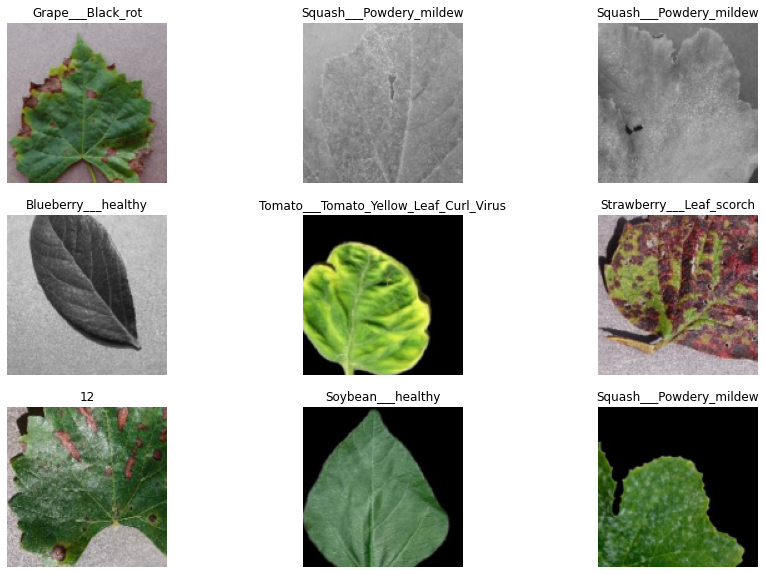

In [9]:
data.show_batch(figsize=(15,10))

In [10]:
model=cnn_learner(data,resnet101, metrics=[error_rate, accuracy])

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.001737800776027143)

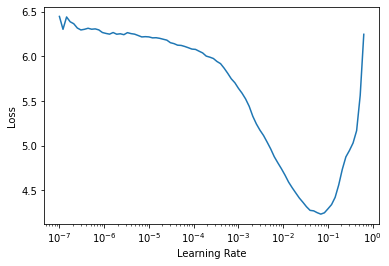

In [11]:
model.lr_find()

In [12]:
model.fine_tune(2, 0.01)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.624435,0.458661,0.156605,0.843395,09:57


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.441877,0.362376,0.151830,0.848170,11:29
1,0.313071,0.269324,0.115361,0.884639,11:29


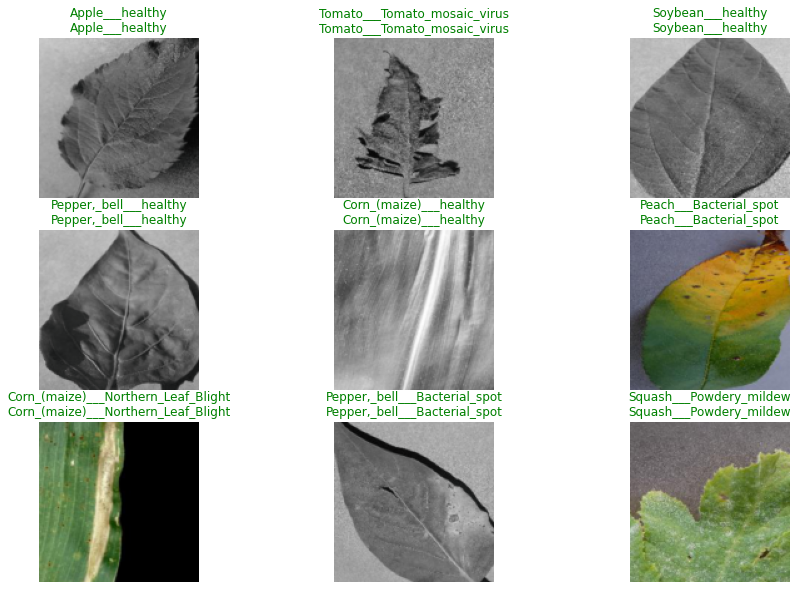

In [13]:
model.show_results(figsize=(15,10))

In [ ]:
interp=Interpretation.from_learner(model)
interp.plot_top_losses(9,figsize=(20,10))

In [ ]:
model.save('fin_model')